In [1]:
import sklearn
print(sklearn.__version__)

1.5.1


In [15]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [17]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
dtst = pd.read_csv("HousePricePrediction.csv")
dtst.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [21]:
dtst.shape

(2919, 13)

In [ ]:
# 1. Data Preprocessing :
# Now, we categorize the features depending on their datatype (int, float, object) 
# and then calculate the number of them.

In [17]:
obj = (dtst.dtypes=='object')
object_cols = list(obj[obj].index)
# print("categorial Variables : ", len(object_cols))
object_cols


['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [22]:
obj = dtst.dtypes=='object'
object_cols = list(obj[obj].index)
print("categorical Variables : ", len(object_cols))
object_cols

categorical Variables :  4


['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [23]:
int1 = dtst.dtypes=='int'
int_cols = list(int1[int1].index)
print("Integer Variables : ", len(int_cols))
int_cols

Integer Variables :  6


['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd']

In [24]:
flt = dtst.dtypes=='float'
float_cols = list(flt[flt].index)
print("Float Variables : " , len(float_cols))
float_cols

Float Variables :  3


['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']

In [1]:
# Exploratory Data Analysis :
# EDA refers to the deep analysis of data so as to discover different patterns 
# and spot anomalies/outliers. Before making inferences from data it is essential to examine all your variables.

# So here let’s make a heatmap using seaborn library.

In [27]:
dtst = pd.read_csv("HousePricePrediction.csv")
dtst.head()

dtst1 = dtst.drop("LotConfig" , axis=1)
dtst2 = dtst1.drop("MSZoning", axis=1)
dtst3 = dtst2.drop("BldgType", axis=1)
dtst4 = dtst3.drop("Exterior1st", axis=1)
dtst4
dtst4.head()


,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0


In [28]:
dtst4.dtypes

Id                int64
MSSubClass        int64
LotArea           int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [29]:
print(dtst4.corr())

                    Id  MSSubClass   LotArea  OverallCond  YearBuilt  \
Id            1.000000    0.008931 -0.040746    -0.002839  -0.016581   
MSSubClass    0.008931    1.000000 -0.201730    -0.065625   0.034409   
LotArea      -0.040746   -0.201730  1.000000    -0.035617   0.024128   
OverallCond  -0.002839   -0.065625 -0.035617     1.000000  -0.368477   
YearBuilt    -0.016581    0.034409  0.024128    -0.368477   1.000000   
YearRemodAdd -0.050438    0.043315  0.021612     0.047654   0.612235   
BsmtFinSF2    0.018251   -0.072530  0.084059     0.041501  -0.027595   
TotalBsmtSF  -0.024924   -0.219965  0.254138    -0.174002   0.408515   
SalePrice    -0.021917   -0.084284  0.263843    -0.077856   0.522897   

              YearRemodAdd  BsmtFinSF2  TotalBsmtSF  SalePrice  
Id               -0.050438    0.018251    -0.024924  -0.021917  
MSSubClass        0.043315   -0.072530    -0.219965  -0.084284  
LotArea           0.021612    0.084059     0.254138   0.263843  
OverallCond       0

                    Id  MSSubClass   LotArea  OverallCond  YearBuilt  \
Id            1.000000    0.008931 -0.040746    -0.002839  -0.016581   
MSSubClass    0.008931    1.000000 -0.201730    -0.065625   0.034409   
LotArea      -0.040746   -0.201730  1.000000    -0.035617   0.024128   
OverallCond  -0.002839   -0.065625 -0.035617     1.000000  -0.368477   
YearBuilt    -0.016581    0.034409  0.024128    -0.368477   1.000000   
YearRemodAdd -0.050438    0.043315  0.021612     0.047654   0.612235   
BsmtFinSF2    0.018251   -0.072530  0.084059     0.041501  -0.027595   
TotalBsmtSF  -0.024924   -0.219965  0.254138    -0.174002   0.408515   
SalePrice    -0.021917   -0.084284  0.263843    -0.077856   0.522897   

              YearRemodAdd  BsmtFinSF2  TotalBsmtSF  SalePrice  
Id               -0.050438    0.018251    -0.024924  -0.021917  
MSSubClass        0.043315   -0.072530    -0.219965  -0.084284  
LotArea           0.021612    0.084059     0.254138   0.263843  
OverallCond       0

<Axes: >

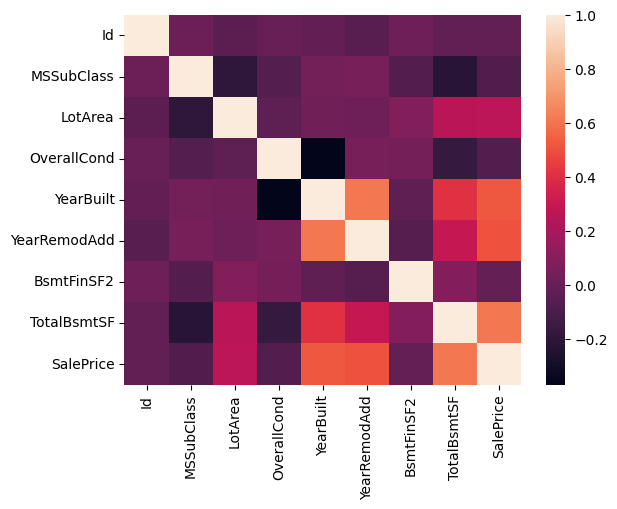

In [30]:
print(dtst4.corr())

sns.heatmap(dtst4.corr())


                    Id  MSSubClass   LotArea  OverallCond  YearBuilt  \
Id            1.000000    0.008931 -0.040746    -0.002839  -0.016581   
MSSubClass    0.008931    1.000000 -0.201730    -0.065625   0.034409   
LotArea      -0.040746   -0.201730  1.000000    -0.035617   0.024128   
OverallCond  -0.002839   -0.065625 -0.035617     1.000000  -0.368477   
YearBuilt    -0.016581    0.034409  0.024128    -0.368477   1.000000   
YearRemodAdd -0.050438    0.043315  0.021612     0.047654   0.612235   
BsmtFinSF2    0.018251   -0.072530  0.084059     0.041501  -0.027595   
TotalBsmtSF  -0.024924   -0.219965  0.254138    -0.174002   0.408515   
SalePrice    -0.021917   -0.084284  0.263843    -0.077856   0.522897   

              YearRemodAdd  BsmtFinSF2  TotalBsmtSF  SalePrice  
Id               -0.050438    0.018251    -0.024924  -0.021917  
MSSubClass        0.043315   -0.072530    -0.219965  -0.084284  
LotArea           0.021612    0.084059     0.254138   0.263843  
OverallCond       0

<Axes: >

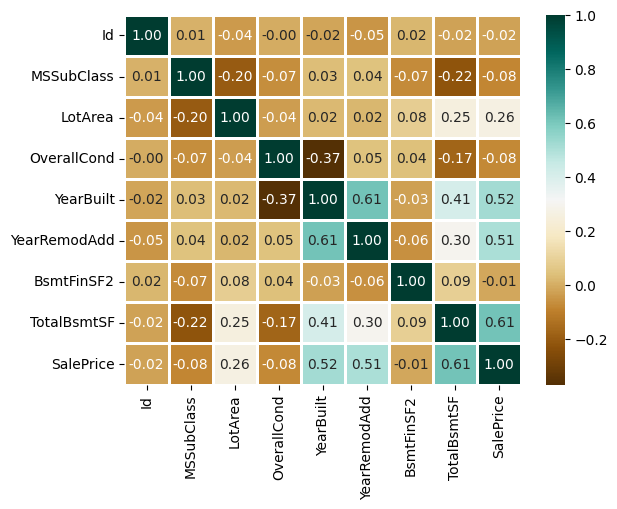

In [31]:
print(dtst4.corr())
sns.heatmap(dtst4.corr(), cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True)

In [32]:
dtst.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [33]:
# Identifying categorical columns : 
# The variable object_cols is expected to contain a list of column names that are categorical. 
# (typically columns with string or object data types).

obj_cols = [col for col in dtst.columns      
           if dtst[col].dtype == 'object']
print("Categorial coulmns :", obj_cols)

Categorial coulmns : ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


In [34]:
# Another way to get Categorical Columns in list :

obj = dtst.dtypes=='object'
object_cols = list(obj[obj].index)
print("Categorical Columns : ", object_cols)

Categorical Columns :  ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


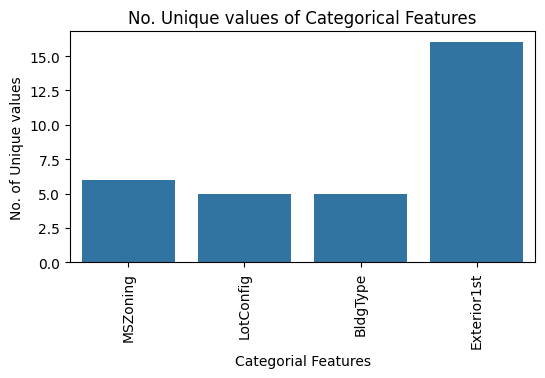

In [35]:
# Collect unique value counts for each categorical feature : 
# 1. A list called unique_values is created to store the count of unique values 
# for each categorical column.
# 2. A for loop iterates over each column name in object_cols.
# 3. For each column, dataset[col].unique().size calculates the number of unique 
# values, which is then appended to the unique_values list.
 
unique_values = []
for col in obj_cols:
    unique_values.append(dtst[col].unique().size)

# Plotting the bar plot :
# 1. plt.figure(figsize=(6,3)): This line sets the size of the figure to be 10 inches wide and 6 inches tall.
# 2. plt.title('No. Unique values of Categorical Features'): This line sets the title of the plot.
# 3. plt.xticks(rotation=90): This line rotates the x-axis labels by 90 degrees to make them readable, 
# especially when there are many categorical features.
# 4. sns.barplot(x=object_cols, y=unique_values): This line creates a bar plot using Seaborn, where the x-axis 
# represents the categorical columns, and the y-axis represents the number of unique values in each column.

plt.figure(figsize=(6,3))
plt.title("No. Unique values of Categorical Features")
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)
plt.xlabel('Categorial Features')
plt.ylabel('No. of Unique values')
plt.show()

# Another way to write code

# unique_values = []
# for col in object_cols:
#   unique_values.append(dataset[col].unique().size)
# plt.figure(figsize=(10,6))
# plt.title('No. Unique values of Categorical Features')
# plt.xticks(rotation=90)
# sns.barplot(x=object_cols,y=unique_values)


# 1. The plot shows that Exterior1st has around 16 unique categories and other features have 
# around  6 unique categories. 
# 2. To findout the actual count of each category we can plot the bargraph of each four features 
# separately.

In [36]:
dtst

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


Categorial coulmns : ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


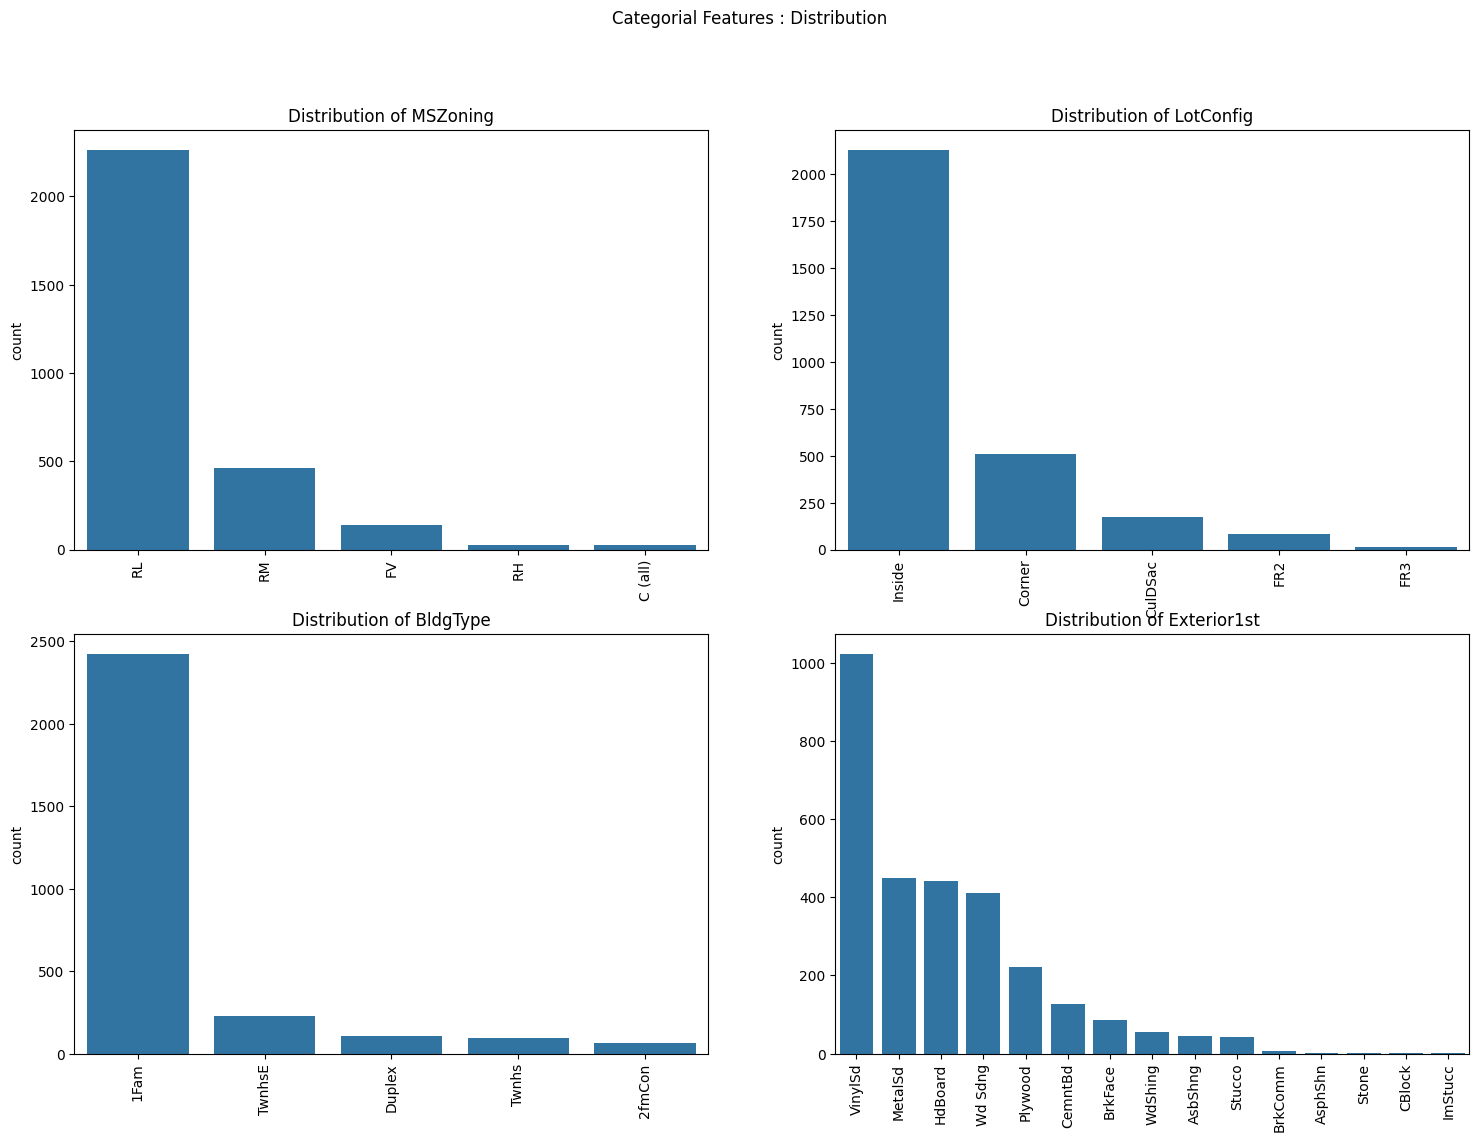

In [37]:
# Figure Setup :
# 1. plt.figure(figsize=(18, 36)): 
   # This creates a new figure with a specified size of 18 inches wide and 36 inches tall. 
# The larger height is likely to accommodate multiple subplots.
# 2. plt.title('Categorical Features: Distribution'): Sets the title of the entire figure.
# 3. plt.xticks(rotation=90): Rotates the x-axis labels by 90 degrees for readability, 
# which helps when the category names are long.

# plt.figure(figsize=(18,36))
# plt.ltite('Categorial Features : Distribution')
# plt.xticks(rotation=90)

# Subplots for Each Categorical Column :
# 1. index = 1: This initializes a variable to track subplot positions. 
# It's incremented with each iteration to create a new subplot.
# 2. for col in object_cols: Loops over each categorical column (from the list object_cols) 
# in the DataFrame dataset.
# 3. y = dataset[col].value_counts(): 
# Calculates the count of unique values in the current categorical column col.
# 4. plt.subplot(11, 4, index): Creates a subplot grid with 11 rows and 4 columns. 
   # The index parameter positions each subplot in the grid. 
# You can adjust 11, 4 to fit your number of categorical features or the preferred layout.
# 5. plt.xticks(rotation=90): 
# Again rotates the x-axis labels for each subplot to make them readable.
# 6. sns.barplot(x=list(y.index), y=y): Creates a bar plot using Seaborn, where the x-axis represents 
# the unique categories and the y-axis represents their frequency count.
# 7. index += 1: Increments the index to move to the next subplot.

# Identifying categorical columns
obj_cols = [col for col in dtst.columns if dtst[col].dtype == 'object']
print("Categorial coulmns :", obj_cols)

# Plotting the distribution of categorical features
plt.figure(figsize=(18,12))   # Adjustable size
plt.suptitle('Categorial Features : Distribution')

index=1
for col in obj_cols:
    y = dtst[col].value_counts()
    plt.subplot(2,2,index)  #Adjusted for fewer columns(2x2 grid)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    plt.title(f'Distribution of {col}')
    index += 1


# Explanation : 
# 1. object_cols: A list containing all the categorical column names. The loop iterates over these columns.
# 2. Subplots: Each categorical feature gets its own subplot, making it easier to see the distribution 
# of values across different features.
# 3. plt.subplot(2, 2, index): This example assumes there are fewer categorical columns and uses a 2x2 grid for 
# demonstration purposes Adjust the subplot grid dimensions(11,4) as needed based on the actual number of categorical columns.


In [ ]:
# Considerations :

# 1. Adjusting Grid Size: The grid size (11, 4) should be adjusted based on the number of categorical columns. 
# Make sure the grid has enough cells to accommodate all plots.
# 2. Figure Size: The size of the figure may need to be adjusted depending on the number of subplots and the dataset's characteristics. 
# Larger datasets with more categories or longer names may require larger figures or different rotation angles for labels.
# 3. Label Overlap: Rotating x-axis labels helps prevent overlap, which is important for readability, 
# especially when dealing with categorical variables with long or numerous categories.
# 4. Layout Adjustments: Using plt.tight_layout() or manually specifying margins can help 
# prevent overlap between subplots and ensure the title and axis labels are visible.


In [ ]:
 # Data Cleaning : 

# Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.
# As in our dataset, there are some columns that are not important and irrelevant for the model training. 
# So, we can drop that column before training. There are 2 approaches to dealing with empty/null values
# 1. We can easily delete the column/row (if the feature or record is not much important).
# 2. Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).

In [38]:
dtst = pd.read_csv("HousePricePrediction.csv")
dtst

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [39]:
# As Id Column will not be participating in any prediction. So we can Drop it.

dtst.drop('Id', axis=1)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [40]:
# Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

dtst['SalePrice'] = dtst['SalePrice'].fillna(dtst['SalePrice']).mean()

# Drop records with null values (as the empty records are very less).

new_dtst = dtst.dropna()

# Checking features which have null values in the new dataframe (if there are still any).

# new_dtst.isnull().sum()


In [ ]:
# OneHotEncoder – For Label categorical features :

# One hot Encoding is the best way to convert categorical data into binary vectors. 
# This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. 
# So for that, firstly we have to collect all the features which have the object datatype. 


In [41]:
obj1 = new_dtst.dtypes=='object'
object_cols1 = list(obj1[obj1].index)
print("Categorical Columns : ", len(object_cols1))
object_cols1

Categorical Columns :  4


['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [1]:
# Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [ ]:
# OH_encoder = OneHotEncoder(sparse=False)
# OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
# OH_cols.index = new_dataset.index
# OH_cols.columns = OH_encoder.get_feature_names()
# df_final = new_dataset.drop(object_cols, axis=1)
# df_final = pd.concat([df_final, OH_cols], axis=1)

In [42]:
OH_encoder = OneHotEncoder(sparse_output=False)  # Initialize OneHotEncoder
# OneHotEncoder(sparse=False): This initializes an instance of the OneHotEncoder. 
# The parameter sparse=False indicates that the output should be a dense array rather than a sparse matrix. 
# This makes the output easier to work with directly in pandas.

OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dtst[object_cols1])) # One-hot encode the categorical columns
# 1. new_dataset[object_cols]: Here, new_dataset is the original DataFrame, and 
# object_cols is a list of column names that contain categorical (or object type) data.
# 2. OH_encoder.fit_transform(...): This method fits the encoder to the categorical columns and 
# transforms the data into one-hot encoded format.
# 3. pd.DataFrame(...): The result is converted into a pandas DataFrame for easier handling and 
# integration with the rest of the DataFrame.

OH_cols.index = new_dtst.index    # Set the index to match the original DataFrame
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols1) # Set column names to be more descriptive
# 1. OH_cols.index = new_dataset.index: This sets the index of the newly created OH_cols DataFrame to match the index of the original new_dataset. 
# This ensures that the rows align correctly when concatenating.
# 2. OH_cols.columns = OH_encoder.get_feature_names_out(object_cols) : This sets the column names of the 
# one-hot encoded DataFrame to be descriptive, showing which category each new column corresponds to. 
# The get_feature_names_out method automatically generates names like columnName_value.

df_final = new_dtst.drop(object_cols1,axis=1)  # Drop original categorical columns
# Dropping Original Categorical Columns :
# This line creates a new DataFrame (df_final) by dropping the original categorical columns from new_dataset. 
# The original categorical columns are being replaced by their one-hot encoded versions.

df_final = pd.concat([df_final, OH_cols], axis=1)  # Concatenate the one-hot encoded columns with the rest of the DataFrame  
# Concatenating DataFrames :
# pd.concat([...], axis=1): This line concatenates the modified DataFrame 
# (df_final, which no longer has the original categorical columns) 
# with the new one-hot encoded columns (OH_cols). 
# The axis=1 argument specifies that the concatenation should be column-wise.


print(df_final)


        Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0        0          60     8450            5       2003          2003   
1        1          20     9600            8       1976          1976   
2        2          60    11250            5       2001          2002   
3        3          70     9550            5       1915          1970   
4        4          60    14260            5       2000          2000   
...    ...         ...      ...          ...        ...           ...   
2914  2914         160     1936            7       1970          1970   
2915  2915         160     1894            5       1970          1970   
2916  2916          20    20000            7       1960          1996   
2917  2917          85    10441            5       1992          1992   
2918  2918          60     9627            5       1993          1994   

      BsmtFinSF2  TotalBsmtSF     SalePrice  MSZoning_C (all)  ...  \
0            0.0        856.0  180921.19589          

In [ ]:
# Splitting Dataset into Training and Testing

In [43]:
X = df_final.drop(['SalePrice'], axis=1)  # SalePrice column
Y = df_final['SalePrice']                 # Rest of the other columns          

# Split the training set into training and validation set

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, train_size=0.2,test_size=0.2, random_state=0) 

print("Training set")
print(X_train)
print(Y_train)

print("\nvalidation set")
print(X_valid)
print(Y_valid)

Training set
        Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  \
1453  1453          20    17217            5       2006          2006   
2021  2021          20    19508            5       1974          1974   
188    188          90     7018            5       1979          1979   
1273  1273          80    11512            7       1959          2006   
1960  1960          20     7560            5       1971          1971   
...    ...         ...      ...          ...        ...           ...   
1790  1790          90     9671            5       1969          1969   
1045  1045          20    13680            5       1955          1955   
31      31          20     8544            6       1966          2006   
2727  2727          20    10368            6       1964          1964   
2031  2031         120     4385            5       2001          2001   

      BsmtFinSF2  TotalBsmtSF  MSZoning_C (all)  MSZoning_FV  ...  \
1453         0.0       1140.0            

In [ ]:
# Model and Accuracy
# As we have to train the model to determine the continuous values, 
# so we will be using these regression models.

# 1. SVM-Support Vector Machine
# 2. Random Forest Regressor
# 3. Linear Regressor

# And To calculate loss we will be using the mean_absolute_percentage_error module. 
# It can easily be imported by using sklearn library. 

In [ ]:
# 2. Random Forest Regressor :
# Random Forest is an ensemble technique that uses multiple of decision trees and 
# can be used for both regression and classification tasks.

In [44]:
model_RFR = RandomForestRegressor(n_estimators=10)
# Initialize the RandomForestRegressor model
model_RFR.fit(X_train, Y_train)
# Train the model
Y_pred = model_RFR.predict(X_valid)
# Predict on the validation set

mape = mean_absolute_percentage_error(Y_valid, Y_pred)
print("Mean Absolute Percentage Error :", mape)

# Calculate and print the Mean Absolute Percentage Error (MAPE)

Mean Absolute Percentage Error : 3.2172936193018222e-15


In [ ]:
# 1. SVM – Support vector Machine :
# SVM can be used for both regression and classification model. 
# It finds the hyperplane in the n-dimensional plane.

In [45]:
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

mape = mean_absolute_percentage_error(Y_valid, Y_pred)
print("Mean Absolute Percentage Error :", mape)


Mean Absolute Percentage Error : 0.0


In [ ]:
# 3. Linear Regression
# Linear Regression predicts the final output-dependent value based on the given independent features. 
# Like, here we have to predict SalePrice depending on features 
# like MSSubClass, YearBuilt, BldgType, Exterior1st etc.

In [46]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

1.6086468096509106e-16
